<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/oilSG_pybrain_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/ANN

/content/drive/My Drive/ANN


In [3]:
!git clone https://github.com/angular/angular-phonecat.git

fatal: destination path 'angular-phonecat' already exists and is not an empty directory.


In [4]:
cd /content/drive/My Drive/pybrain

/content/drive/My Drive/pybrain


In [5]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [20]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import pandas as pd

In [21]:
cd /content/drive/My Drive

/content/drive/My Drive


In [22]:
df = pd.read_excel('oil SG.xlsx')

In [23]:
df

,T,P,Rs,Sgo
0,140.0,2551.0,683.000000,0.896307
1,163.0,2766.0,706.000000,0.869913
2,150.0,2110.0,571.410000,0.852564
3,165.0,2181.0,591.700000,0.854365
4,150.0,2158.0,643.530000,0.846039
...,...,...,...,...
501,205.0,830.0,1.299484,0.772170
502,205.0,625.0,1.280984,0.777714
503,205.0,425.0,1.262065,0.782922
504,205.0,229.0,1.235861,0.790140


#data cleaning

In [24]:
import numpy as np

In [25]:
df.drop('Rs', axis=1, inplace=True)

In [26]:
def fillnanP(col):
    if pd.isnull(col):
      return (df['P']!=np.NAN).mean()
    else:
      return col

In [27]:
def fillnanT(col):
    if pd.isnull(col):
      return (df['T']!=np.NAN).mean()
    else:
      return col

In [28]:
df['P'] = df['P'].apply(fillnanP)

In [29]:
df['T'] = df['T'].apply(fillnanT)

In [30]:
df.dropna(inplace=True)

In [31]:
df

,T,P,Sgo
0,140.0,2551.0,0.896307
1,163.0,2766.0,0.869913
2,150.0,2110.0,0.852564
3,165.0,2181.0,0.854365
4,150.0,2158.0,0.846039
...,...,...,...
501,205.0,830.0,0.772170
502,205.0,625.0,0.777714
503,205.0,425.0,0.782922
504,205.0,229.0,0.790140


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       480 non-null    float64
 1   P       480 non-null    float64
 2   Sgo     480 non-null    float64
dtypes: float64(3)
memory usage: 15.0 KB


# test train split and scaling

In [53]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('Sgo', axis=1), df['Sgo'], test_size=0.1, random_state=100)

In [56]:
scaler = MinMaxScaler()

In [57]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train.max() , X_train.min()

(1.0, 0.0)

In [59]:
X_test.max() , X_test.min()

(1.0, 0.0)

In [60]:
y_test.max() , y_test.min()

(0.9049, 0.7398308797237482)

In [61]:
type(X_train)

numpy.ndarray

In [63]:
import seaborn as sns

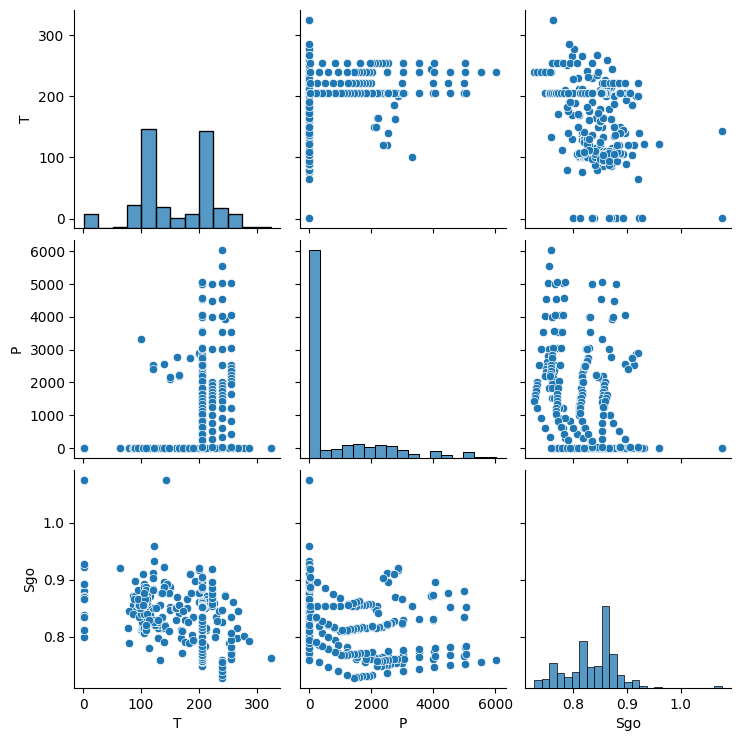

In [64]:
sns.pairplot(df)

<Axes: xlabel='P', ylabel='Sgo'>

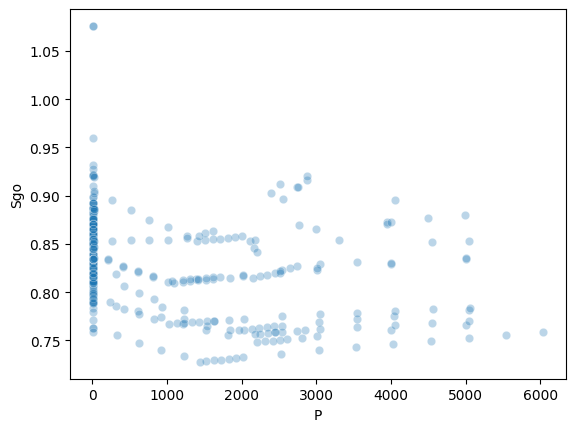

In [65]:
sns.scatterplot(data=df, x='P', y='Sgo', alpha=0.3)

<Axes: xlabel='T', ylabel='Sgo'>

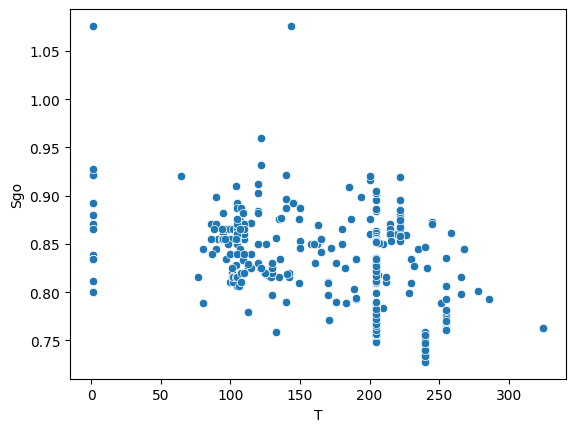

In [66]:
sns.scatterplot(data=df, x='T', y='Sgo')

In [67]:
df.corr()

,T,P,Sgo
T,1.000000,0.521808,-0.507691
P,0.521808,1.000000,-0.414561
Sgo,-0.507691,-0.414561,1.000000


In [68]:
df.corr()['Sgo']

T     -0.507691
P     -0.414561
Sgo    1.000000
Name: Sgo, dtype: float64

#Create a network with two inputs, three hidden, and one output

#Create a dataset that matches network input and output sizes

In [73]:
len(y_test)

48

In [74]:
len(X_test)

48

In [116]:
data = df.values

train_data = data[:,0:2]
train_output = data[:,2]

In [ ]:
print(train_data)
print(train_output)

In [119]:
from pybrain.tools.shortcuts import buildNetwork
nn = buildNetwork(2, 3, 1, bias=True, hiddenclass=TanhLayer)

In [120]:
from pybrain.datasets import SupervisedDataSet
gate = SupervisedDataSet(2, 1)
print(gate)

input: dim(0, 2)
[]

target: dim(0, 1)
[]




In [121]:
# Add input and target values to dataset
# Values for NOR truth table
for i in range(0, len(train_output)) :
   gate.addSample(train_data[i], train_output[i])


In [122]:
#Training the network with dataset
trainer = BackpropTrainer(nn, gate)

In [123]:
# will run the loop 1000 times to train it.
for epoch in range(1000):
   trainer.train()

In [124]:
trainer

<BackpropTrainer 'BackpropTrainer-55'>

In [125]:
trainer.testOnData(dataset=gate, verbose = True)


Testing on data:
('out:    ', '[0.803 ]')
('correct:', '[0.896 ]')
error:  0.00436151
('out:    ', '[0.803 ]')
('correct:', '[0.87  ]')
error:  0.00224468
('out:    ', '[0.803 ]')
('correct:', '[0.853 ]')
error:  0.00123275
('out:    ', '[0.803 ]')
('correct:', '[0.854 ]')
error:  0.00132383
('out:    ', '[0.803 ]')
('correct:', '[0.846 ]')
error:  0.00093005
('out:    ', '[0.803 ]')
('correct:', '[0.842 ]')
error:  0.00074887
('out:    ', '[0.803 ]')
('correct:', '[0.854 ]')
error:  0.00129219
('out:    ', '[0.803 ]')
('correct:', '[0.873 ]')
error:  0.00243175
('out:    ', '[0.803 ]')
('correct:', '[0.871 ]')
error:  0.00232798
('out:    ', '[0.803 ]')
('correct:', '[0.912 ]')
error:  0.00598469
('out:    ', '[0.803 ]')
('correct:', '[0.916 ]')
error:  0.00643902
('out:    ', '[0.803 ]')
('correct:', '[0.921 ]')
error:  0.00694954
('out:    ', '[0.803 ]')
('correct:', '[0.902 ]')
error:  0.00494002
('out:    ', '[0.803 ]')
('correct:', '[0.909 ]')
error:  0.00568071
('out:    ', '[0

0.0008228176702129174

#FNN

In [127]:
#Adding Modules and Connections

from pybrain.structure import FeedForwardNetwork
from pybrain.structure import LinearLayer, SigmoidLayer
from pybrain.structure import FullConnection


In [128]:
network = FeedForwardNetwork()

In [129]:
#creating layer for input => 2 , hidden=> 3 and output=>1
inputLayer = LinearLayer(2)
hiddenLayer = SigmoidLayer(3)
outputLayer = LinearLayer(1)

In [130]:
#adding the layer to feedforward network
network.addInputModule(inputLayer)
network.addModule(hiddenLayer)
network.addOutputModule(outputLayer)

In [131]:
#Create connection between input ,hidden and output
input_to_hidden = FullConnection(inputLayer, hiddenLayer)
hidden_to_output = FullConnection(hiddenLayer, outputLayer)

In [132]:
#add connection to the network
network.addConnection(input_to_hidden)
network.addConnection(hidden_to_output)
network.sortModules()

In [133]:
print(network)

FeedForwardNetwork-62
   Modules:
    [<LinearLayer 'LinearLayer-59'>, <SigmoidLayer 'SigmoidLayer-63'>, <LinearLayer 'LinearLayer-64'>]
   Connections:
    [<FullConnection 'FullConnection-60': 'SigmoidLayer-63' -> 'LinearLayer-64'>, <FullConnection 'FullConnection-61': 'LinearLayer-59' -> 'SigmoidLayer-63'>]



In [134]:
#Training Network Using Optimization Algorithms
from pybrain.datasets import SupervisedDataSet
from pybrain.optimization.populationbased.ga import GA
from pybrain.tools.shortcuts import buildNetwork

In [135]:
import numpy as np

In [138]:
ga = GA(gate.evaluateModuleMSE, nn, minimize=True)

In [ ]:
for i in range(0, len(train_output)) :
   gate.addSample(train_data[i], train_output[i])

In [144]:
for i in range(100):
    net = ga.learn(0)[0]

In [ ]:
train_data

In [ ]:
train_output

In [ ]:
for i in range(0, len(train_output)) :
  print(net.activate(train_data[i]))

# Evaluate

In [151]:
# net.activate(train_data[i] vs train_output

In [158]:
# Define a function to evaluate the predictions
# def evaluate_predictions(predictions, targets):
#     num_samples = len(targets)
#     correct_predictions = sum(predictions == targets)
#     accuracy = correct_predictions / num_samples
#     return accuracy

In [162]:
# predictions = []
# for sample in gate:
#     prediction = net.activate(sample[0])
#     predictions.append(round(prediction[0]))  # Convert to binary prediction

# targets = [int(sample[1][0]) for sample in gate]

# accuracy = evaluate_predictions(predictions, targets)
# print(f"Accuracy: {accuracy:.2f}")

In [152]:
predictions = np.array([net.activate(sample[0]) for sample in gate])
targets = np.array([sample[1] for sample in gate])

In [153]:
# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(predictions - targets))
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.03


In [154]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((predictions - targets)**2))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.04
